In [1]:
#Ordenar el CSV

import pandas as pd


df = pd.read_csv('housing data2.csv', header=None)


df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']


print(df)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273.0   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273.0   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273.0   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273.0   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273.0   

     PTRATIO       B  LSTAT  MEDV  
0       15.3  396.90   4.98  24.0  
1       17.8  396.90   9.14

<h1>Exercici 1</h1>

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


X = df.drop('MEDV', axis=1)
y = df['MEDV']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


reg_model = LinearRegression()
reg_model.fit(X_train, y_train)


y_pred_reg = reg_model.predict(X_test)


mse_reg = mean_squared_error(y_test, y_pred_reg)
r2_reg = r2_score(y_test, y_pred_reg)

In [3]:
from sklearn.ensemble import RandomForestRegressor


rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)


y_pred_rf = rf_model.predict(X_test)


mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)


<h1>Exercici 2</h1>

In [4]:

print("Model de Regresió Lineal:")
print("MSE:", mse_reg)
print("R^2:", r2_reg)

print("Random Forest:")
print("MSE:", mse_rf)
print("R^2:", r2_rf)

Model de Regresió Lineal:
MSE: 24.29111947497371
R^2: 0.6687594935356294
Random Forest:
MSE: 7.901513892156864
R^2: 0.8922527442109116


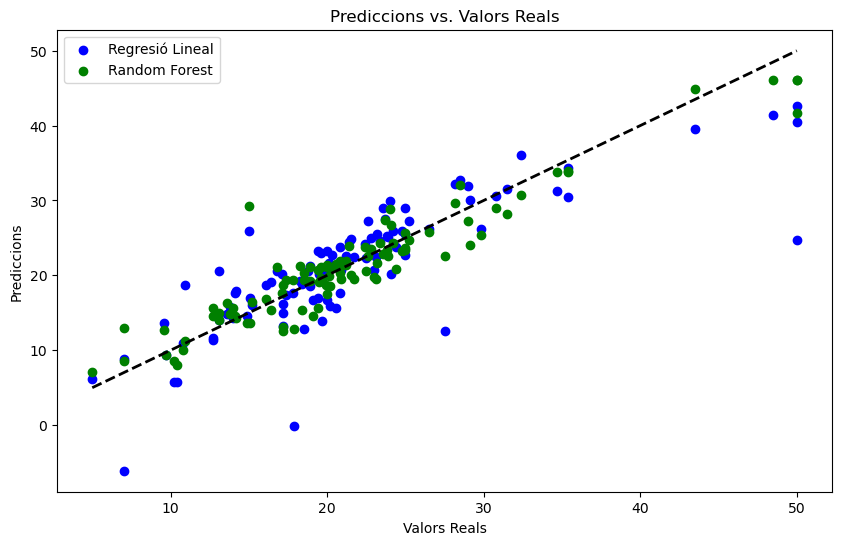

In [5]:
#Comparació gràfica

import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))

#
plt.scatter(y_test, y_pred_reg, color='blue', label='Regresió Lineal')


plt.scatter(y_test, y_pred_rf, color='green', label='Random Forest')


plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)

plt.xlabel('Valors Reals')
plt.ylabel('Prediccions')
plt.title('Prediccions vs. Valors Reals')
plt.legend()
plt.show()


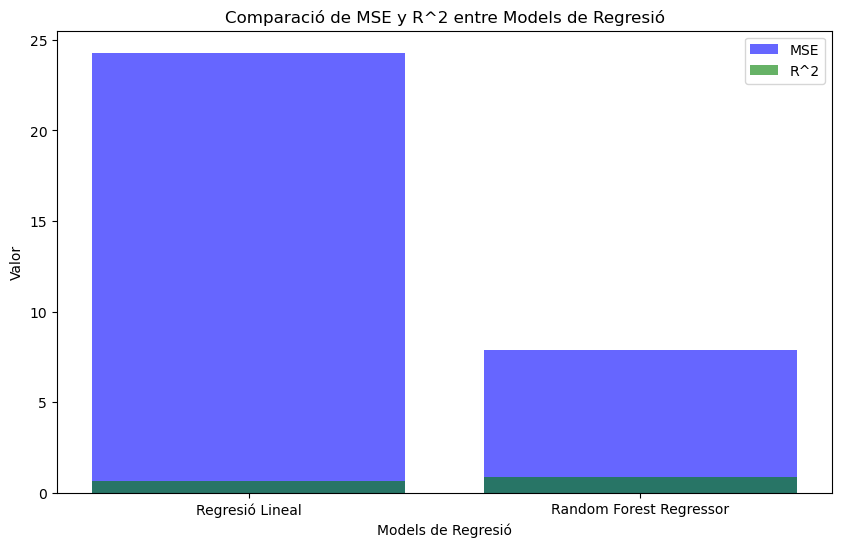

In [6]:
metrics = ['MSE', 'R^2']
regression_models = ['Regresió Lineal', 'Random Forest Regressor']
mse_values = [mse_reg, mse_rf]
r2_values = [r2_reg, r2_rf]

plt.figure(figsize=(10, 6))
plt.bar(regression_models, mse_values, color='blue', alpha=0.6, label='MSE')
plt.bar(regression_models, r2_values, color='green', alpha=0.6, label='R^2')

plt.xlabel('Models de Regresió')
plt.ylabel('Valor')
plt.title('Comparació de MSE y R^2 entre Models de Regresió')
plt.legend()
plt.show()


<h1>Exercici 3</h1>

In [7]:
from sklearn.model_selection import GridSearchCV


param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}


rf_model = RandomForestRegressor(random_state=42)


grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)


best_params_rf = grid_search.best_params_
print("Millors paràmetres per Random Forest:")
print(best_params_rf)


best_rf_model = grid_search.best_estimator_
best_rf_model.fit(X_train, y_train)


y_pred_best_rf = best_rf_model.predict(X_test)


mse_best_rf = mean_squared_error(y_test, y_pred_best_rf)
r2_best_rf = r2_score(y_test, y_pred_best_rf)

print("Model Random Forest amb millors paràmetres:")
print("MSE:", mse_best_rf)
print("R^2:", r2_best_rf)


Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Millors paràmetres per Random Forest:
{'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Model Random Forest amb millors paràmetres:
MSE: 10.689625999999999
R^2: 0.8542332668610557


<h1>Exercici 4</h1>

In [8]:

from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


reg_model = LinearRegression()
reg_model.fit(X_train, y_train)


best_rf_model = grid_search.best_estimator_
best_rf_model.fit(X_train, y_train)


y_pred_reg = reg_model.predict(X_test)
y_pred_best_rf = best_rf_model.predict(X_test)


mse_reg = mean_squared_error(y_test, y_pred_reg)
r2_reg = r2_score(y_test, y_pred_reg)

mse_best_rf = mean_squared_error(y_test, y_pred_best_rf)
r2_best_rf = r2_score(y_test, y_pred_best_rf)


print("Aproximació train/test")
print("Model de Regresió Lineal:")
print("MSE:", mse_reg)
print("R^2:", r2_reg)

print("Model Random Forest Regressor amb millors paràmetres:")
print("MSE:", mse_best_rf)
print("R^2:", r2_best_rf)


Aproximació train/test
Model de Regresió Lineal:
MSE: 24.29111947497371
R^2: 0.6687594935356294
Model Random Forest Regressor amb millors paràmetres:
MSE: 10.689625999999999
R^2: 0.8542332668610557


<h1>Exercici 5</h1>

In [10]:

X_no_rm = X.drop('RM', axis=1)


X_train_no_rm, X_test_no_rm, y_train, y_test = train_test_split(X_no_rm, y, test_size=0.2, random_state=42)


reg_model_no_rm = LinearRegression()
reg_model_no_rm.fit(X_train_no_rm, y_train)


best_rf_model_no_rm = grid_search.best_estimator_
best_rf_model_no_rm.fit(X_train_no_rm, y_train)


y_pred_reg_no_rm = reg_model_no_rm.predict(X_test_no_rm)
y_pred_best_rf_no_rm = best_rf_model_no_rm.predict(X_test_no_rm)



In [15]:

predictions_df = pd.DataFrame({'Valors Reals': y_test, 'Prediccions Regresió Lineal': y_pred_reg_no_rm, 'Predicciones Random Forest': y_pred_best_rf_no_rm})

print(predictions_df)



     Valors Reals  Prediccions Regresió Lineal  Predicciones Random Forest
173          23.6                    30.913702                      25.548
274          32.4                    37.027202                      34.052
491          13.6                    12.046900                      15.022
72           22.8                    25.566452                      25.226
452          16.1                    17.690595                      17.912
..            ...                          ...                         ...
412          17.9                     2.989475                      13.588
436           9.6                    12.634243                      13.038
411          17.2                    14.114423                      14.240
86           22.5                    22.897583                      21.270
75           21.4                    24.052416                      24.078

[102 rows x 3 columns]


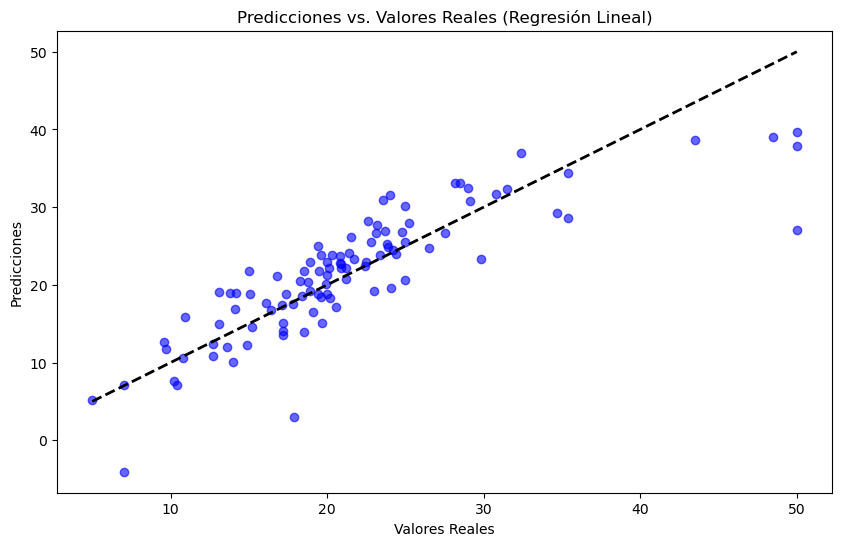

In [12]:

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_reg_no_rm, color='blue', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)
plt.xlabel('Valors Reals')
plt.ylabel('Prediccions')
plt.title('Prediccions vs. Valors Reals (Regresió Lineal)')
plt.show()


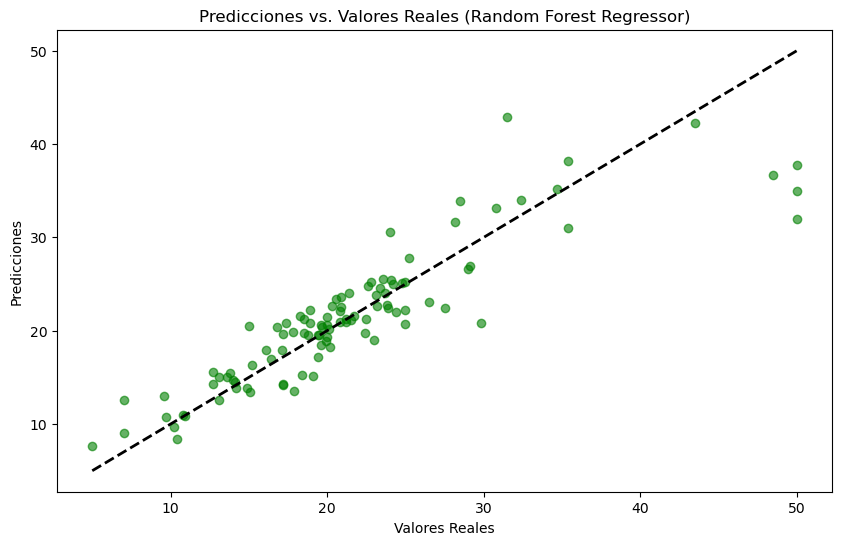

In [13]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_best_rf_no_rm, color='green', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)
plt.xlabel('Valors Reales')
plt.ylabel('Prediccions')
plt.title('Prediccions vs. Valors Reals (Random Forest Regressor)')
plt.show()
